In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
PATH = 'Titanic-Dataset.csv'
OUTCOME = 'Survived'
FEATS = ['Fare', 'Age', 'SibSp', 'Parch', 'Sex']
dataset = pd.read_csv(PATH)
dataset = dataset[FEATS + [OUTCOME]].dropna()

for column in dataset.columns:
    if type(dataset[column][0]) is str:
        dataset[column], fac_table = pd.factorize(dataset[column])
        print(fac_table)
    if dataset[column].dtype == np.float64:
        dataset[column] = (dataset[column] - dataset[column].min()) / (dataset[column].max() - dataset[column].min())

dataset


Index(['male', 'female'], dtype='object')


,Fare,Age,SibSp,Parch,Sex,Survived
0,0.014151,0.271174,1,0,0,0
1,0.139136,0.472229,1,0,1,1
2,0.015469,0.321438,0,0,1,1
3,0.103644,0.434531,1,0,1,1
4,0.015713,0.434531,0,0,0,0
...,...,...,...,...,...,...
885,0.056848,0.484795,0,5,1,0
886,0.025374,0.334004,0,0,0,0
887,0.058556,0.233476,0,0,1,1
889,0.058556,0.321438,0,0,0,1


<Axes: >

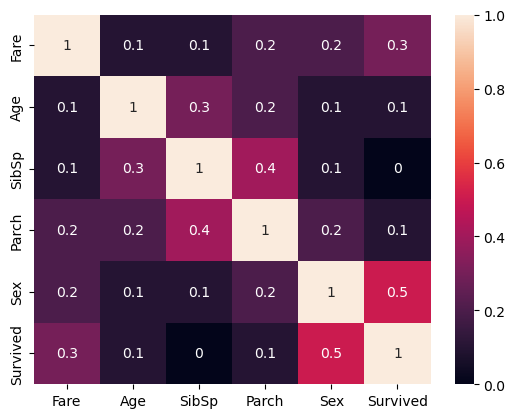

In [3]:
sns.heatmap(
    round(
        abs(dataset.corr()),
        1,
    ),
    annot=True
)

In [4]:
train_input, test_input, train_output, test_output = train_test_split(
    dataset.drop(OUTCOME, axis=1),
    dataset[OUTCOME],
    test_size=0.2
)

0.8181818181818182
0.7894736842105263
0.7627118644067796
0.7758620689655172


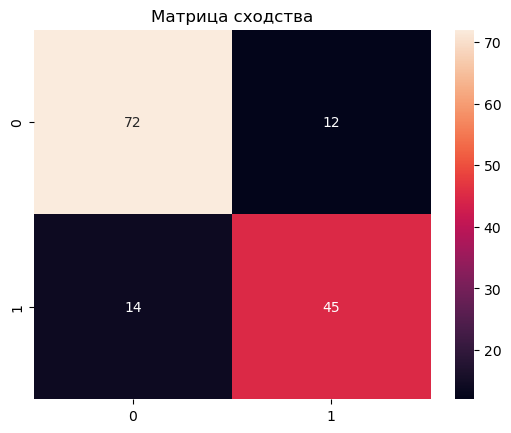

In [28]:
model = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=50,
    min_samples_split=30,
)

model.fit(train_input, train_output)
predictions = model.predict(test_input)

confusion_matrix = sklearn.metrics.confusion_matrix(test_output, predictions)
sns.heatmap(
    confusion_matrix,
    annot=True
)
plt.title('Матрица сходства')
print(sklearn.metrics.accuracy_score(test_output, predictions))
print(sklearn.metrics.precision_score(test_output, predictions))
print(sklearn.metrics.recall_score(test_output, predictions))
print(sklearn.metrics.f1_score(test_output, predictions))

Text(0.5, 1.0, 'Дерево решений')

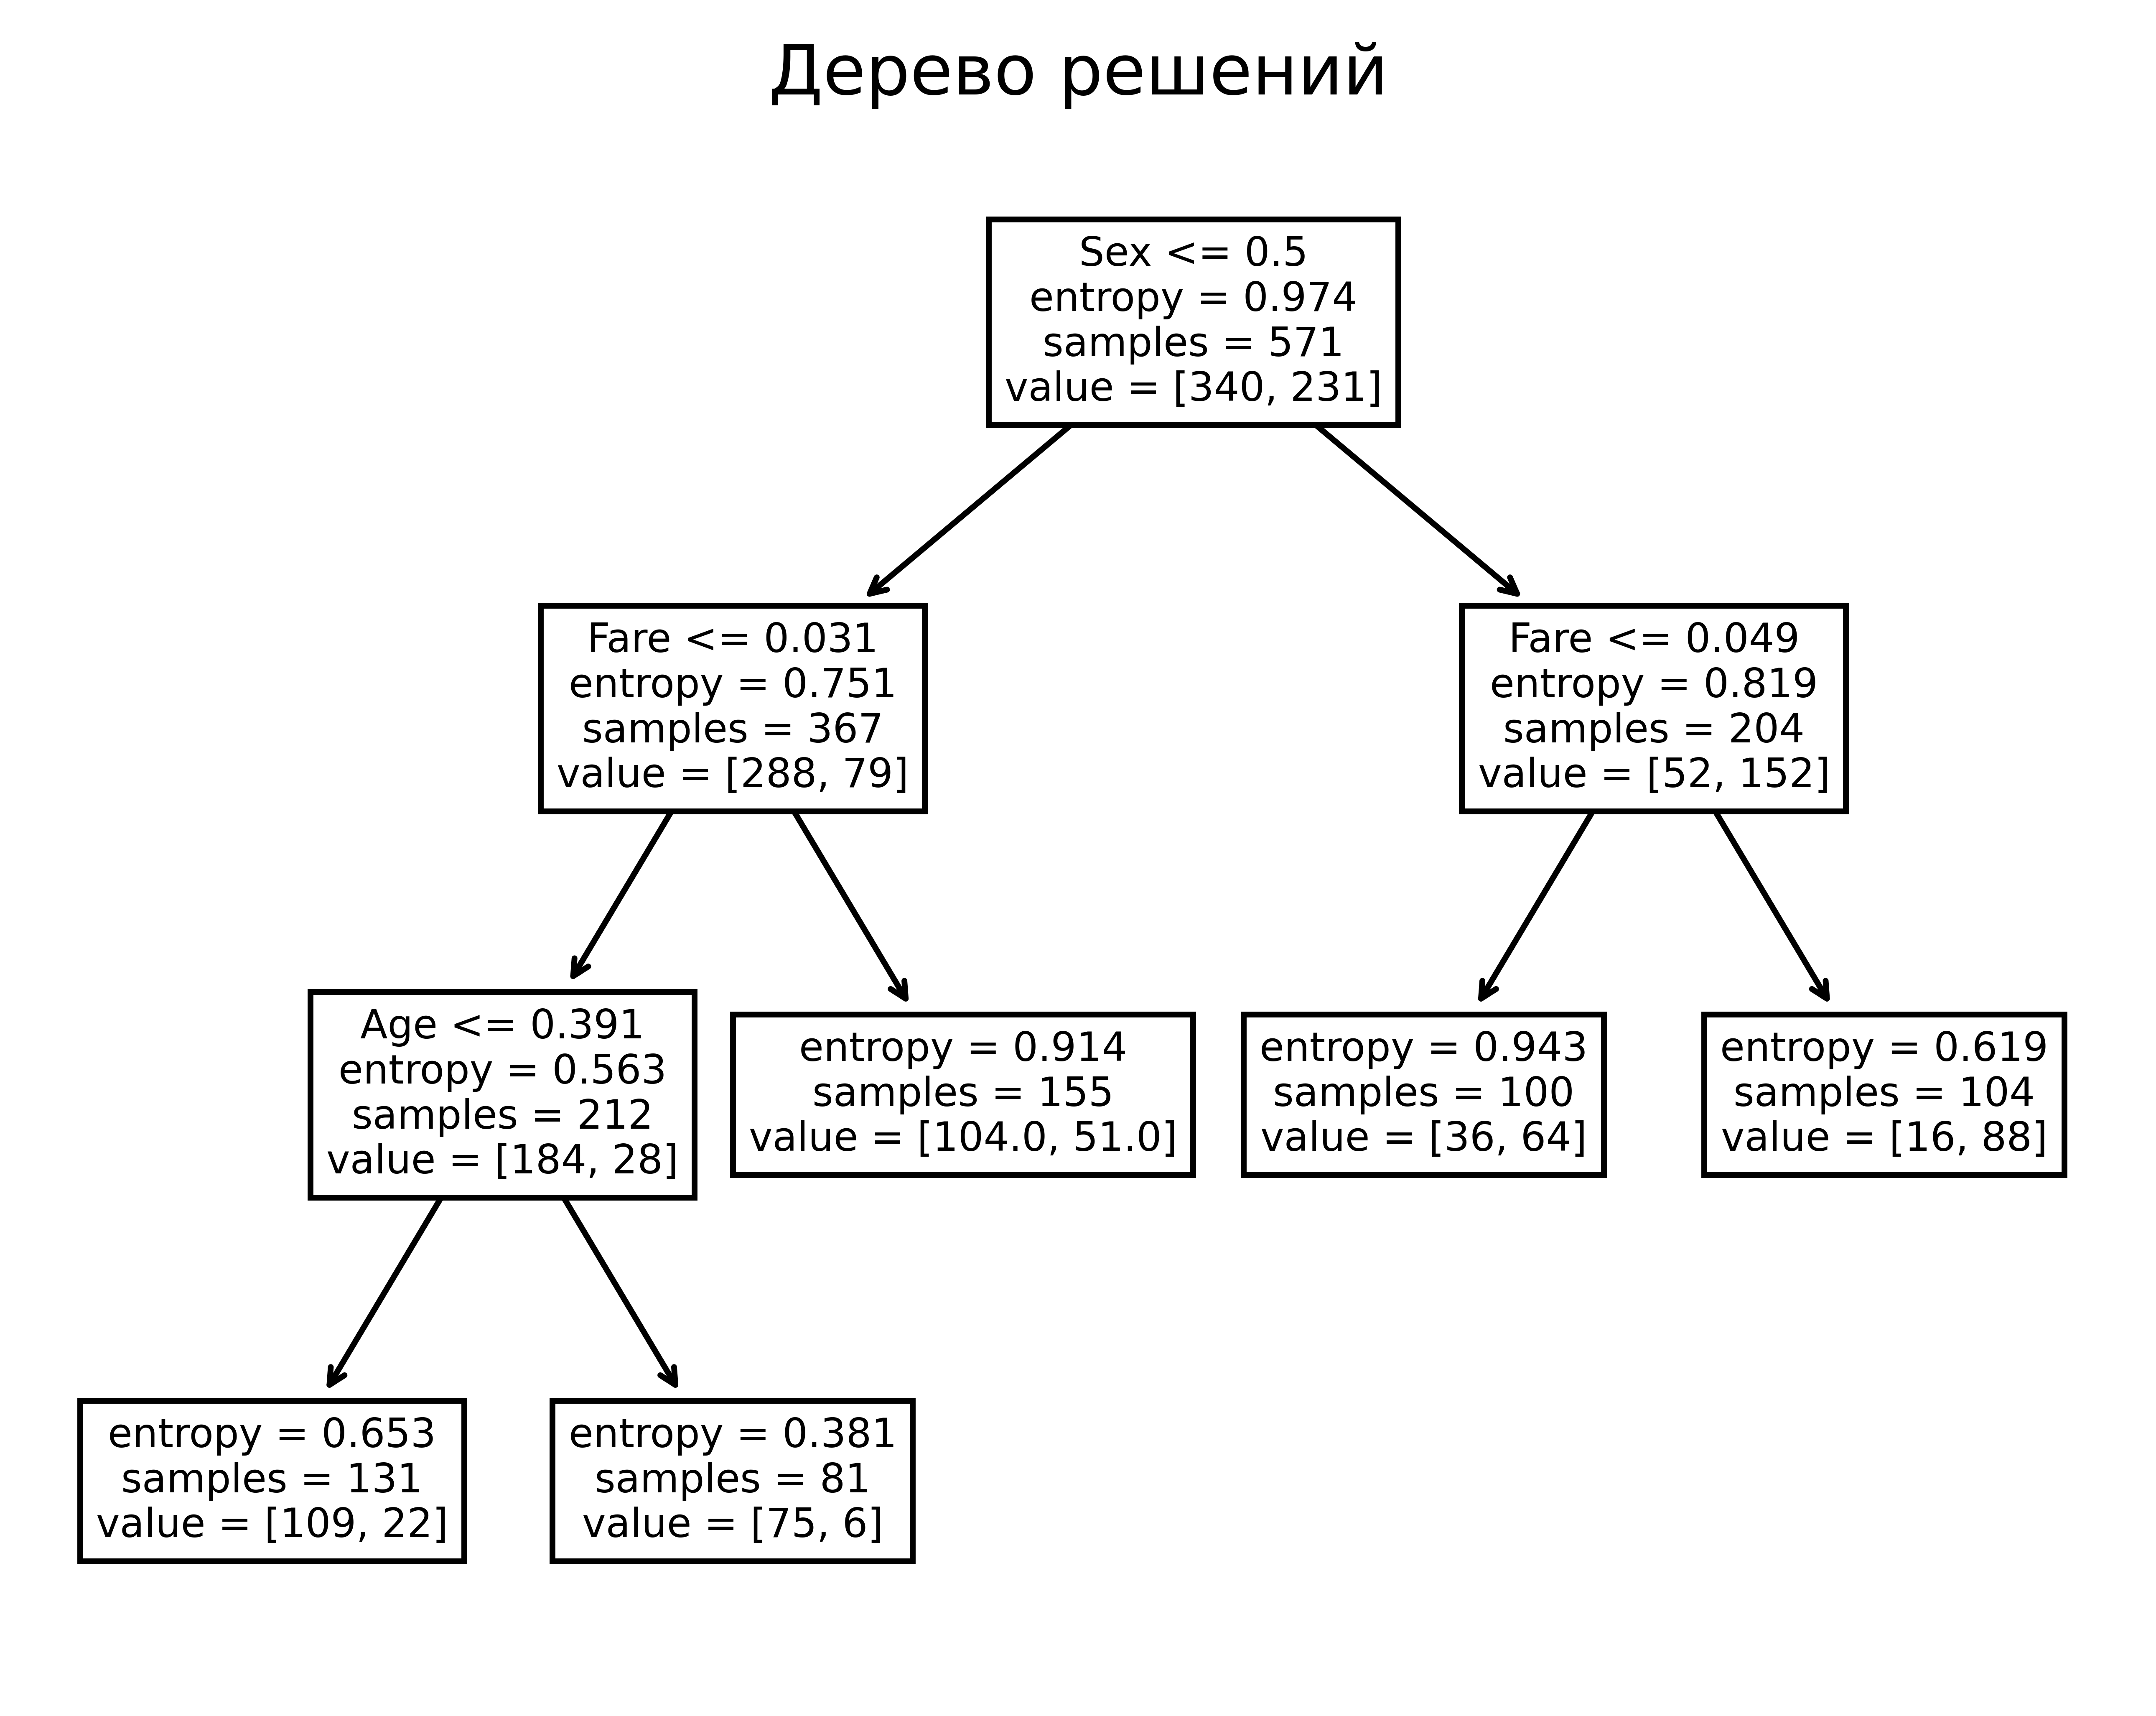

In [24]:
DPI = 1000
plt.figure(dpi=DPI)
tree.plot_tree(model, feature_names=FEATS)
plt.title("Дерево решений")